In [1]:

# Auto-reload internal modules
%load_ext autoreload
%autoreload 2

# External modules
import numpy as np

# Internal modules
from cosmotd.domain_walls import plot_domain_wall_simulation, run_domain_wall_ratio_trials, run_domain_wall_ratio_trials_percentile
from cosmotd.cosmic_strings import plot_cosmic_string_simulation
from cosmotd.charged_domain_walls import plot_charged_domain_wall_simulation
from cosmotd.pentavac import plot_pentavac_simulation
from cosmotd.single_axion import plot_single_axion_simulation, run_single_axion_domain_wall_trials
from cosmotd.companion_axion import plot_companion_axion_simulation, run_companion_axion_domain_wall_trials
from cosmotd.plot import *
from cosmotd.parameters import *

In [2]:
# Size of simulation grid
N = 50
# Model parameters
beta = 1
eta_phi = 1
eta_sigma = np.sqrt(3) / 2
lam_phi = 2
lam_sigma = 2
charge_density = 0.1
# RNG seed
seed = 486761876
# Run time
run_time = None
# Plotter
plotter = MplNotebookPlotter

In [ ]:
%%time
# Domain walls simulation
# file_name = "domain_wall_M200_N200_np23213241.ctdd"
file_name = None
plot_domain_wall_simulation(200, 200, DX, DT, ALPHA_2D, eta_phi, RADIATION_ERA, 5, Plotter, run_time, file_name, seed)

In [ ]:
%%time
# Cosmic strings simulation
file_name = None
plot_cosmic_string_simulation(200, 200, DX, DT, ALPHA_2D, eta_phi, RADIATION_ERA, 5, Plotter, run_time, file_name, seed)

In [ ]:
%%time
# Charged domain walls simulation
# file_name = "charged_domain_walls_rho0.1_M200_N200_np23213241.ctdd"
file_name = None
plot_charged_domain_wall_simulation(
    200,
    200,
    DX,
    DT,
    ALPHA_2D,
    beta,
    eta_phi,
    eta_sigma,
    lam_phi,
    lam_sigma,
    charge_density,
    RADIATION_ERA,
    Plotter,
    run_time,
    file_name,
    seed
)

In [ ]:
%%time
# Pentavac model simulation
file_name = None
epsilon = 0.1
plot_pentavac_simulation(200, 200, DX, DT, ALPHA_2D, epsilon, RADIATION_ERA, Plotter, run_time, file_name, seed)

In [5]:
%%time
file_name = None
# Single axion
lam = 5
color_anomaly = 3
K = 0.001 * lam
t0 = 750 * DT
growth = 2
plot_single_axion_simulation(300, 300, DX, DT, ALPHA_2D, eta_phi, RADIATION_ERA, lam, color_anomaly, K, t0, growth, MplMultiPlotter, 6000, file_name, seed)

# num_trials = 5
# dw_ratios = [None] * num_trials
# for idx in range(num_trials):
#     dw_count = plot_single_axion_simulation(300, 300, DX, DT, ALPHA_2D, eta_phi, RADIATION_ERA, lam, color_anomaly, K, t0, growth, Plotter, 6000, file_name, None)
#     dw_ratios[idx] = dw_count
# print(dw_ratios)

# import win32api

# win32api.MessageBox(0, "Single Axion simulation complete!", "cosmotd", 0x00001000)

100%|██████████| 6001/6001 [11:04<00:00,  9.03it/s]

CPU times: total: 9min 50s
Wall time: 11min 4s


0.42573333333333335

In [7]:
%%time
file_name = None
# file_name = "companion_axion_M200_N200_np23213241.ctdd"
# Companion axion
lam = 5
# n = 3
# n_prime = 1 / 2
# m = 13 / 2
# m_prime = 3 / 2
n = 3
n_prime = 1
m = 1
m_prime = 1
kappa = 0.04
# This the original value of K (0.001 * lam = 0.005), however it seems to produce numerical artifacts
# K = 0.001 * lam
# Testing values of K
K = 0.0005 * lam
t0 = 750 * DT
n_growth = 2
m_growth = 2
s0 = t0
plot_companion_axion_simulation(300, 300, DX, DT, ALPHA_2D, eta_phi, RADIATION_ERA, lam, n, n_prime, m, m_prime, K, kappa, t0, s0, n_growth, m_growth, MplMultiPlotter, 6000, file_name, 48967)

# num_trials = 5
# phi_dw_ratios = [None] * num_trials
# psi_dw_ratios = [None] * num_trials
# for idx in range(num_trials):
#     phi_dw_count, psi_dw_count = plot_companion_axion_simulation(300, 300, DX, DT, ALPHA_2D, eta_phi, RADIATION_ERA, lam, n, n_prime, m, m_prime, K, kappa, t0, s0, n_growth, m_growth, Plotter, 6000, file_name, None)
#     phi_dw_ratios[idx] = phi_dw_count
#     psi_dw_ratios[idx] = psi_dw_count
# print(phi_dw_ratios)
# print(psi_dw_ratios)

# import win32api

# win32api.MessageBox(0, "Single Axion simulation complete!", "cosmotd", 0x00001000)

100%|██████████| 6001/6001 [25:17<00:00,  3.96it/s]

CPU times: total: 24min 1s
Wall time: 25min 17s


(0.07262222222222223, 0.1601)

# Dispersion #

This is an experimental thing.

In [ ]:
%%time
# Domain wall ratio as a function of width - standard domain wall simulation
test_widths = np.linspace(1, 10, 50)
dw_ratios_mean = np.zeros(test_widths.shape)
dw_ratios_error = np.zeros(test_widths.shape)
seeds_given = None
num_trials = 10

for idx, current_width in enumerate(test_widths):
    dw_ratios, seeds_used = run_domain_wall_ratio_trials(300, 300, DX, DT, ALPHA_2D, eta_phi, RADIATION_ERA, current_width, num_trials, None, seeds_given)
    dw_ratios_mean[idx] = np.mean(dw_ratios)
    dw_ratios_error[idx] = np.std(dw_ratios) / np.sqrt(num_trials)
    if seeds_given is None:
        seeds_given = seeds_used

from matplotlib import pyplot as plt

%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot()

ax.errorbar(test_widths, dw_ratios_mean, yerr=dw_ratios_error)
ax.set_xlabel(r"Wall width$")
ax.set_ylabel(r"Domain wall ratio")

CPU times: total: 1h 52min 31s
Wall time: 1h 56min 38s


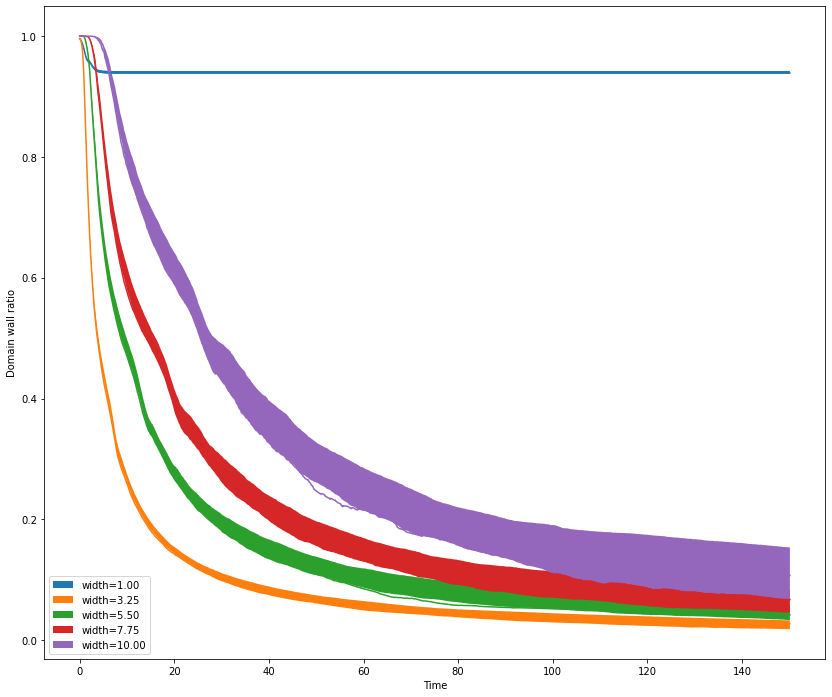

In [22]:
%%time
from matplotlib import pyplot as plt
%matplotlib inline
# Domain wall ratio as a function of width - standard domain wall simulation
test_widths = np.linspace(1, 10, 5)
test_widths_str = [f"width={num:.2f}" for num in test_widths]
dw_ratios_mean = np.zeros(test_widths.shape)
dw_ratios_error = np.zeros(test_widths.shape)
seeds_given = None
num_trials = 50

fig = plt.figure()
fig.set_size_inches(14, 12)
ax = fig.add_subplot()
ax.set_xlabel(r"Time")
ax.set_ylabel(r"Domain wall ratio")

for idx, current_width in enumerate(test_widths):
    dw_ratios_typical, dw_ratios_min, dw_ratios_max, seeds_used = run_domain_wall_ratio_trials_percentile(300, 300, DX, DT, ALPHA_2D, eta_phi, RADIATION_ERA, current_width, num_trials, None, seeds_given)
    time_span = np.linspace(0, DT * len(dw_ratios_typical), len(dw_ratios_typical))
    ax.fill_between(time_span, dw_ratios_min, dw_ratios_max)
    ax.plot(time_span, dw_ratios_typical, label="_nolegend_")
    if seeds_given is None:
        seeds_given = seeds_used
ax.legend(test_widths_str)





In [ ]:
%%time
# Single axion
lam = 5
color_anomalies = [1, 2, 3, 4, 5]
K = 0.001 * lam
t0 = 750 * DT
growth = 2


for idx, color_anomaly in enumerate(color_anomalies):
    dw_ratios, seeds_used = run_single_axion_domain_wall_trials(300, 300, DX, DT, ALPHA_2D, eta_phi, RADIATION_ERA, lam, color_anomaly, K, t0, growth, num_trials, 6000, seeds_given)
    dw_ratios_mean[idx] = np.mean(dw_ratios)
    dw_ratios_error[idx] = np.std(dw_ratios) / np.sqrt(num_trials)
    if seeds_given is None:
        seeds_given = seeds_used

In [ ]:
from matplotlib import pyplot as plt

%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot()

ax.plot(color_anomalies, dw_ratios_mean)
ax.set_xlabel(r"Color Anomaly")
ax.set_ylabel(r"Domain wall ratio")

In [ ]:
%%time
# Companion axion
lam = 5
n = [3, 1, 1, 1]
n_prime = [1, 3, 1, 1]
m = [1, 1, 3, 1]
m_prime = [1, 1, 1, 3]
kappa = 0.04
K = 0.001 * lam
t0 = 750 * DT
n_growth = 2
m_growth = 2
s0 = t0

phi_dw_ratios_mean = np.zeros(len(n))
phi_dw_ratios_error = np.zeros(len(n))
psi_dw_ratios_mean = np.zeros(len(n))
psi_dw_ratios_error = np.zeros(len(n))
num_trials = 5
seeds_given = None


for idx, (current_n , current_n_prime, current_m, current_m_prime) in enumerate(zip(n, n_prime, m, m_prime)):
    phi_dw_ratios, psi_dw_ratios, seeds_used = run_companion_axion_domain_wall_trials(300, 300, DX, DT, ALPHA_2D, eta_phi, RADIATION_ERA, lam, current_n, current_n_prime, current_m, current_m_prime, K, kappa, t0, s0, n_growth, m_growth, num_trials, 6000, seeds_given)
    phi_dw_ratios_mean[idx] = np.mean(phi_dw_ratios)
    phi_dw_ratios_error[idx] = np.std(phi_dw_ratios) / np.sqrt(num_trials)
    psi_dw_ratios_mean[idx] = np.mean(psi_dw_ratios)
    psi_dw_ratios_error[idx] = np.std(psi_dw_ratios) / np.sqrt(num_trials)
    if seeds_given is None:
        seeds_given = seeds_used


